In [1]:
from scipy.io.matlab import loadmat
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog

In [2]:
train_annos_path = "../raw\car_devkit\devkit\cars_train_annos.mat"
test_annos_path = "../raw\car_devkit\devkit\cars_test_annos.mat"
meta_path = "../raw\car_devkit\devkit\cars_meta.mat"

In [3]:
train_annos = loadmat(train_annos_path)
test_annos = loadmat(test_annos_path)

In [4]:
image_stat = test_annos['annotations'][0][4811]
image_stat

(array([[23]], dtype=uint8), array([[62]], dtype=uint8), array([[461]], dtype=uint16), array([[310]], dtype=uint16), array(['04812.jpg'], dtype='<U9'))

In [6]:
x1, y1 = image_stat[0].item(), image_stat[1].item()
x2, y2 = image_stat[2].item(), image_stat[3].item()
image_name = image_stat[5].item()

In [7]:
img = plt.imread(f'../raw/cars_train/{image_name}', cv2.IMREAD_UNCHANGED)
# img = cv2.rectangle(img, (29, 87), (618, 421), (255, 0, 0), 2)

In [8]:
def crop(img, p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return img[ y1 : y2, x1: x2,:]

In [9]:
croped_img = crop(img, (x1, y1), (x2, y2))
# resized = cv2.resize(croped_img, (104, 56), interpolation = cv2.INTER_AREA)

In [10]:
croped_img = crop(img, (x1, y1), (x2, y2))
resized = cv2.resize(croped_img, (104, 56), interpolation = cv2.INTER_AREA)

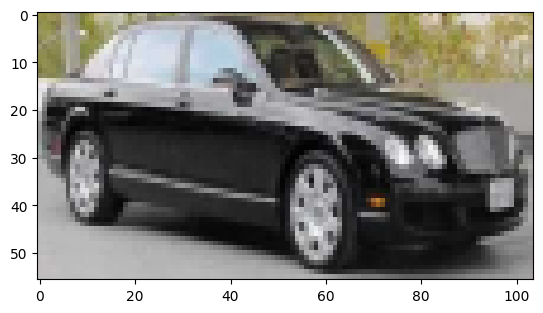

In [11]:
plt.imshow(resized)

In [13]:
resized_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

In [21]:
resized_gray.shape

(56, 104)

In [23]:
hog(resized_gray, cells_per_block = (2,2)).shape

(2592,)